In [1]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4,kernel_regularizer = keras.regularizers.l2(0.001), activation='relu', input_shape=(10000)))
model.add(keras.layers.Dense(0.5))
model.add(keras.layers.Dense(4,keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.Dense(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.compile(optimizer= keras.optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [6]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 75ms/step - loss: 0.6165 - acc: 0.7037 - val_loss: 0.4352 - val_acc: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3669 - acc: 0.8846 - val_loss: 0.3383 - val_acc: 0.8672
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2533 - acc: 0.9233 - val_loss: 0.2851 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1901 - acc: 0.9390 - val_loss: 0.2995 - val_acc: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1615 - acc: 0.9482 - val_loss: 0.2771 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1265 - acc: 0.9609 - val_loss: 0.2923 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1100 - acc: 0.9665 - val_loss: 0.2983 - val_acc: 0.8842
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0864 - a

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

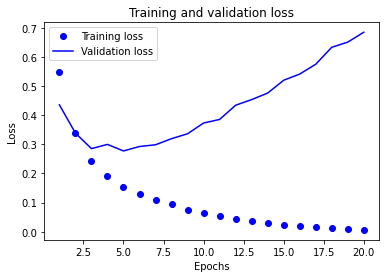

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

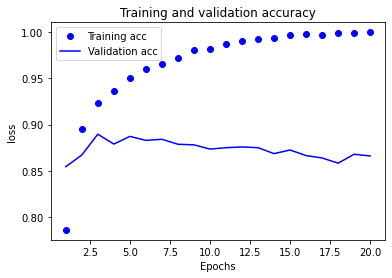

In [9]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.5430 - accuracy: 0.7501
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2633 - accuracy: 0.9135
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1967 - accuracy: 0.9339
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8790


In [11]:
results

[0.3101884424686432, 0.879040002822876]

In [12]:
predictions = model.predict(x_test)